# Problem 1:Prepare a model for glass classification using KNN

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
from google.colab import files
uploaded=files.upload()

Saving glass.csv to glass.csv


In [3]:
glass= pd.read_csv("glass.csv")
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [4]:
def norm(i):
    x=(i-i.min())/(i.max()-i.min())
    return x

In [6]:
X= norm(glass.iloc[::,0:9:])
X

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.432836,0.437594,1.000000,0.252336,0.351786,0.009662,0.308550,0.000000,0.0
1,0.283582,0.475188,0.801782,0.333333,0.521429,0.077295,0.223048,0.000000,0.0
2,0.220808,0.421053,0.790646,0.389408,0.567857,0.062802,0.218401,0.000000,0.0
3,0.285777,0.372932,0.821826,0.311526,0.500000,0.091787,0.259294,0.000000,0.0
4,0.275241,0.381955,0.806236,0.295950,0.583929,0.088567,0.245353,0.000000,0.0
...,...,...,...,...,...,...,...,...,...
209,0.223003,0.512782,0.000000,0.806854,0.500000,0.012882,0.348513,0.336508,0.0
210,0.250219,0.630075,0.000000,0.529595,0.580357,0.000000,0.276022,0.504762,0.0
211,0.417032,0.545865,0.000000,0.538941,0.644643,0.000000,0.279740,0.520635,0.0
212,0.235294,0.548872,0.000000,0.514019,0.678571,0.000000,0.283457,0.498413,0.0


In [7]:
Y= glass.iloc[::,9:10:]
Y

,Type
0,1
1,1
2,1
3,1
4,1
...,...
209,7
210,7
211,7
212,7


In [8]:
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier


In [13]:
kfold = KFold(n_splits=21)

In [14]:
glassmodel= KNeighborsClassifier(n_neighbors=3)
results = cross_val_score(glassmodel,X,Y,cv=kfold)

In [15]:
print(results.mean())

0.5471861471861472


In [ ]:
#Grid search for algorithm tuning

In [16]:
n_neighbors = np.array([2*i+1 for i in range(0,20)])
param_grid = dict(n_neighbors=n_neighbors)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [18]:
grid=GridSearchCV(glassmodel,param_grid=param_grid,cv=kfold)

In [19]:
grid.fit(X,Y)

GridSearchCV(cv=KFold(n_splits=21, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [20]:
grid.best_score_

0.5662337662337662

In [21]:
grid.best_params_

{'n_neighbors': 7}

In [ ]:
#Visualizing the KNN CV results

In [22]:
n_neighbors1 = np.array([2*i+1 for i in range(0,20)])
knn_score = []
for i in n_neighbors1:
    glassmodel1= KNeighborsClassifier(n_neighbors=i)
    result1 = cross_val_score(glassmodel1,X,Y,cv=kfold)
    knn_score.append(result1.mean())

<BarContainer object of 20 artists>

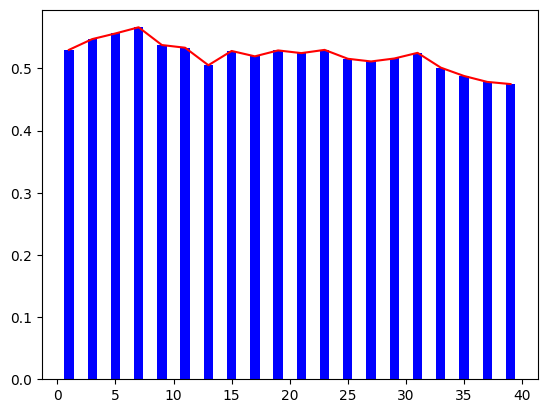

In [23]:
import matplotlib.pyplot as plt
plt.plot(n_neighbors1,knn_score,color='red')
plt.bar(n_neighbors1,knn_score,color='blue')

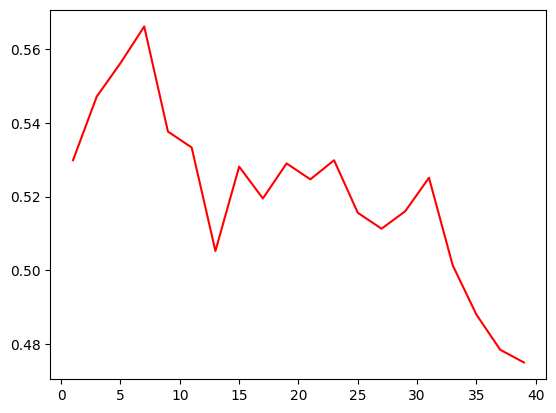

In [24]:
plt.plot(n_neighbors1,knn_score,color='red')

In [ ]:
#Also checking for the best value for cv

In [32]:
cv1 = np.array([i for i in range(2,20)])
knn_score1 = []
for i in cv1:
    glassmodel1= KNeighborsClassifier(n_neighbors=7)
    result1 = cross_val_score(glassmodel1,X,Y,cv=i)
    knn_score1.append(result1.mean())

<BarContainer object of 18 artists>

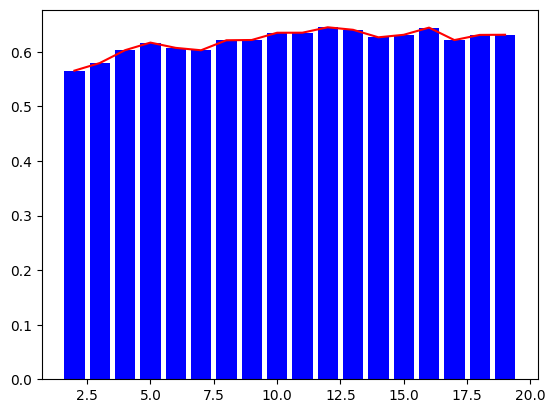

In [33]:
import matplotlib.pyplot as plt
plt.plot(cv1,knn_score1,color='red')
plt.bar(cv1,knn_score1,color='blue')

In [ ]:
#It is increasing so will take higher values

In [52]:
cv1 = np.array([i for i in range(20,75)])
knn_score1 = []
for i in cv1:
    glassmodel1= KNeighborsClassifier(n_neighbors=7)
    result1 = cross_val_score(glassmodel1,X,Y,cv=i)
    knn_score1.append(result1.mean())

<BarContainer object of 55 artists>

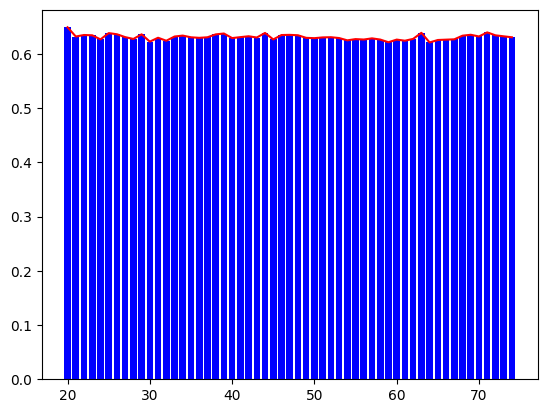

In [53]:
import matplotlib.pyplot as plt
plt.plot(cv1,knn_score1,color='red')
plt.bar(cv1,knn_score1,color='blue')

In [ ]:
#So lets try for the 75 splits

In [54]:
kfold = KFold(n_splits=75)

In [55]:
glassmodel= KNeighborsClassifier(n_neighbors=7)
results = cross_val_score(glassmodel,X,Y,cv=kfold)

In [56]:
print(results.mean())

0.611111111111111


In [ ]:
# So we are getting maximum accuracy with 75 splits for the glass classification model

# Implement a KNN model to classify the animals in to categorie

In [57]:
from google.colab import files
uploaded=files.upload()

Saving Zoo.csv to Zoo.csv


In [58]:
zoo= pd.read_csv("Zoo.csv")
zoo

,animal name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [59]:
X= zoo.iloc[::,1:17:]
X

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize
0,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
1,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1
2,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0
3,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1
4,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1
97,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0
98,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1
99,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0


In [60]:
Y= zoo.iloc[::,17:18:]
Y

,type
0,1
1,1
2,4
3,1
4,1
...,...
96,1
97,6
98,1
99,7


In [61]:
kfold = KFold(n_splits=10)

In [62]:
zoomodel = KNeighborsClassifier(n_neighbors=3)
results = cross_val_score(zoomodel,X,Y,cv=kfold)
print(results.mean())

0.9400000000000001


In [ ]:
#finding out the optimum value of the n_neighbours visually

In [63]:
neighbour = np.array([2*i+1 for i in range(0,20)])
knnscore=[]
for i in neighbour:
    zoomodel1 = KNeighborsClassifier(n_neighbors=i)
    results1= cross_val_score(zoomodel1,X,Y,cv=kfold)
    knnscore.append(results1.mean())


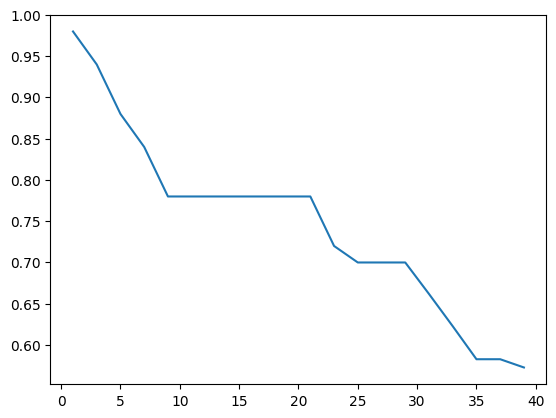

In [64]:
plt.plot(neighbour, knnscore)

In [ ]:
#Grid search for the best neighbour

In [65]:
n_neighbors = np.array([2*i+1 for i in range(0,20)])
param_grid = dict(n_neighbors=n_neighbors)

In [66]:
grid=GridSearchCV(zoomodel,param_grid=param_grid,cv=kfold)

In [67]:
grid.fit(X,Y)

GridSearchCV(cv=KFold(n_splits=10, random_state=None, shuffle=False),
             estimator=KNeighborsClassifier(n_neighbors=3),
             param_grid={'n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])})

In [68]:
grid.best_score_

0.9800000000000001

In [69]:
grid.best_params_

{'n_neighbors': 1}

In [ ]:
# Hence best accuracy is with the 1 neighbour only along with 10 cross fits but 1 is very minimum number so we consider it as 3